In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from os.path import join

from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
INPUT_SIZE = 224
NUM_CLASSES = 120
SEED = 1993
np.random.seed(seed=SEED)
data_dir = '../data'

labels = pd.read_csv(join(data_dir, 'labels.csv'))
print('Number of all train images: {}'.format(len(labels)))
print("Train data has {} classes.".format(len(labels.groupby('breed').count())))
assert len(labels.groupby('breed').count()) == NUM_CLASSES, 'Number of classes in training set is not 120!'

sample_submission = pd.read_csv(join(data_dir, 'sample_submission.csv'))
print('Number of all test images: {}'.format(len(sample_submission)))

Number of all train images: 10222
Train data has 120 classes.
Number of all test images: 10357


In [3]:
def read_img(img_id, train_or_test, size=None):
    img = image.load_img(join(data_dir, train_or_test, '%s.jpg' % img_id), target_size=size)
    img = image.img_to_array(img)
    return img

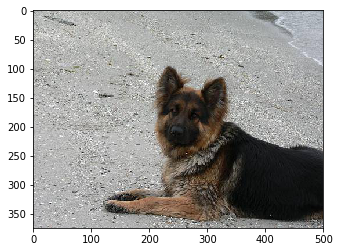

In [4]:
plt.imshow(read_img('00a3edd22dc7859c487a64777fc8d093', 'test') / 255)

In [5]:
# Highest counts of train images dimensions.
# Here we can see that the images come in plenty weird shapes, this should be standardized before learning.
img_shapes = []
for i, img_id in enumerate(labels.id):
    img_shapes.append(read_img(img_id, 'train').shape)
img_shapes_df = pd.DataFrame(columns=['x', 'y', 'z'], data=img_shapes)
print(img_shapes_df.groupby(['x', 'y']).count().sort_values(['z'], ascending=False))

              z
x    y         
375  500   2647
333  500   1033
500  375    615
     333    363
334  500    172
332  500    153
500  334     71
400  500     69
500  500     67
300  400     58
500  332     57
374  500     52
357  500     52
480  640     46
500  357     44
335  500     41
331  500     35
240  320     34
376  500     32
225  300     31
500  400     27
360  480     25
200  200     25
150  200     20
378  500     20
500  374     19
270  360     19
338  500     18
377  500     17
359  500     17
...         ...
290  402      1
     480      1
     500      1
291  288      1
     300      1
     400      1
     428      1
     478      1
292  226      1
     273      1
     301      1
290  250      1
     229      1
     226      1
288  500      1
     300      1
     346      1
     351      1
     352      1
     384      1
     433      1
289  197      1
290  220      1
289  216      1
     300      1
     349      1
     360      1
     425      1
290  200      1
2562 238